# **Supervised Learning code for Disaster Tweet Classification**

Installing the libraries


In [1]:
!pip3 install ktrain==0.7.1

     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 6.7MB 22.4MB/s 
     |████████████████████████████████| 983kB 44.4MB/s 
     |████████████████████████████████| 245kB 54.2MB/s 
     |████████████████████████████████| 1.8MB 40.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.1-cp36-none-any.whl size=113531 sha256=ca8e84ba551cb14ecdf63ad5cd690767ff6be8189039e954da4273f18987af38
  Stored in directory: /root/.cache/pip/wheels/b3/8b/ba/b274eb6f796b689e0eb2b2a05d88d1e1d66e5df88278aaf422
  Created wheel for keras-bert: filename=keras_bert-0.84.0-cp36-none-any.whl size=36139 sha256=12bc018d9610a56a4dbc9a3ebb98749fbc772e7490aab6d86f8a0384316fc6bd
  Stored in directory: /root/.cache/pip/wheels/1f/59/04/12e95257aebfd27f7edaaf65ab7dd57b5f6cadfb183f1a4ccd
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=a50a2c17f9042c3463cec20438290528f23a7a6062cc6c4fb10a934501397587
  Stored in directory: /root/.cache/

### Importing Libraries


In [2]:
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text
import pandas as pd

using Keras version: 2.3.0-tf


### Reading training file

In [3]:
train_df = pd.read_csv("train.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Splitting training data in to training and validation data

In [4]:
random_seed = 12342
x_train, x_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'], shuffle=True, test_size = 0.2, random_state=random_seed, stratify=train_df['target'])

### Convert data to features for BERT

In [5]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names= ["0", "1"],
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=65, 
                                                                                          max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


### Create Model Instance and train it for 6 epochs




In [6]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=16)

Is Multi-Label? False
maxlen is 65
done.


In [ ]:
learner.lr_find()             # briefly simulate training to find good learning rate
   

simulating training for different learning rates... this may take a few moments...
Train on 6090 samples
Epoch 1/1024
6090/6090 [==============================] - 188s 31ms/sample - loss: 0.6748 - acc: 0.5511
Epoch 2/1024
6090/6090 [==============================] - 188s 31ms/sample - loss: 0.4483 - acc: 0.8087
Epoch 3/1024
6090/6090 [==============================] - 187s 31ms/sample - loss: 0.7296 - acc: 0.5663
Epoch 4/1024
 560/6090 [=>............................] - 17s 30ms/sample - loss: 2.2778 - acc: 0.4643


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


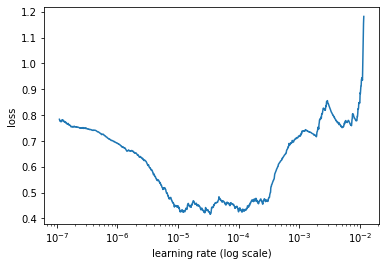

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Train on 6090 samples, validate on 1523 samples
Epoch 1/1024
6090/6090 [==============================] - 208s 34ms/sample - loss: 0.4704 - acc: 0.7837 - val_loss: 0.4007 - val_acc: 0.8273
Epoch 2/1024
6090/6090 [==============================] - 206s 34ms/sample - loss: 0.3585 - acc: 0.8540 - val_loss: 0.3724 - val_acc: 0.8437
Epoch 3/1024
6090/6090 [==============================] - 204s 34ms/sample - loss: 0.3038 - acc: 0.8790 - val_loss: 0.4075 - val_acc: 0.8385
Epoch 4/1024
6090/6090 [==============================] - ETA: 0s - loss: 0.2520 - acc: 0.9053
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
6090/6090 [==============================] - 204s 34ms/sample - loss: 0.2520 - acc: 0.9053 - val_loss: 0.4440 - val_acc: 0.8306
Epoch 5/1024
6090/6090 [=======

In [ ]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=['No Disaster', 'Disaster'])

              precision    recall  f1-score   support

 No Disaster       0.84      0.90      0.87       869
    Disaster       0.85      0.77      0.81       654

    accuracy                           0.84      1523
   macro avg       0.85      0.83      0.84      1523
weighted avg       0.84      0.84      0.84      1523



array([[781,  88],
       [150, 504]])

### Getting predictor variable

In [ ]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)

In [7]:
learner.print_layers()

0 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6bf11b42e8>
1 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6bf1126be0>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7f6bf114d198>
3 (trainable=True) : <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f6bf0904668>
4 (trainable=True) : <tensorflow.python.keras.layers.merge.Add object at 0x7f6bf0904160>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7f6bf0904198>
6 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7f6bf114d668>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7f6bf08d55f8>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7f6bf0885358>
9 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7f6bf18e0f28>
10 (trainable=True) : <t

### Getting predictions on test data

In [ ]:
test_df = pd.read_csv("test.csv")
test_df["target"] = predictor.predict(test_df["text"].tolist())

test_df = test_df[["id", "target"]]


In [ ]:
test_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
test_df.to_csv("submisssions.csv", index=False)